In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Stage 2: David

Generate weekly statistics for a single state.

<Axes: >

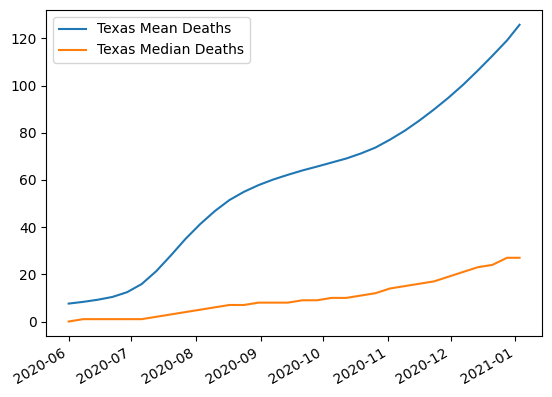

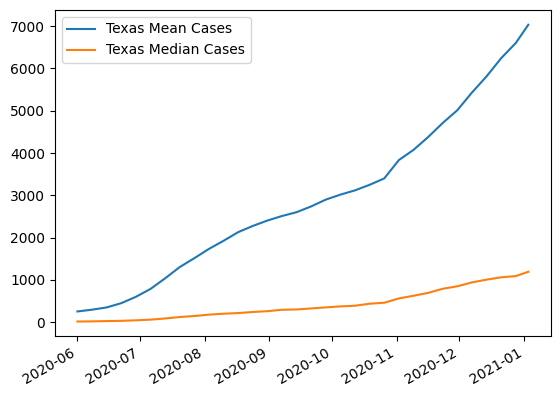

In [40]:
# This is mostly a copy paste of the code Derik and I contributed to the main project.
super_covid = pd.read_csv('./data/super_covid_data.csv')
covid_cases = pd.read_csv('./data/covid_confirmed_usafacts.csv')
covid_deaths = pd.read_csv('./data/covid_deaths_usafacts.csv')
covid_pop = pd.read_csv('./data/covid_county_population_usafacts.csv')

# It will be easier to handle these separately so I'm importing the deaths and cases CSVs again.

# Create a dataframe I actually want to manipulate
cd_date = covid_deaths.drop(covid_deaths.columns[[0, 1, 2, 3]], axis=1, inplace=False)
cp_date = covid_pop.drop(covid_deaths.columns[[0, 1, 2]], axis=1, inplace=False)

#Transpose
cd_date = cd_date.transpose()

# Change the index to a date and time so that I can resample it.
cd_date.index = pd.to_datetime(cd_date.index)

#Repeat this process for Cases
cc_date = covid_cases.drop(covid_cases.columns[[0, 1, 2, 3]], axis=1, inplace=False)
cc_date = cc_date.transpose()
cc_date.index = pd.to_datetime(cc_date.index)

start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime('2021-01-03')

cd_date = cd_date.T
cd_date = cd_date[[col for col in cd_date.columns if start_date <= col <= end_date]]

cc_date = cc_date.T
cc_date = cc_date[[col for col in cc_date.columns if start_date <= col <= end_date]]

cd_last_date = cd_date.iloc[:, -1:]
cd_date = cd_date.loc[:, ::7]
cd_date = pd.concat([cd_date, cd_last_date], axis=1)

cc_last_date = cc_date.iloc[:, -1:]
cc_date = cc_date.loc[:, ::7]
cc_date = pd.concat([cc_date, cc_last_date], axis=1)

# Put my Dataframes back together
covid_deaths.drop(columns=covid_deaths.columns[4:], inplace=True)
covid_deaths = pd.concat([covid_deaths, cd_date], axis=1)
covid_deaths = pd.concat([covid_deaths, cp_date], axis=1)
move = covid_deaths.pop('population')
covid_deaths.insert(0, 'population', move)

covid_cases.drop(columns=covid_cases.columns[4:], inplace=True)
covid_cases = pd.concat([covid_cases, cc_date], axis=1)
covid_cases = pd.concat([covid_cases, cp_date], axis=1)
move = covid_cases.pop('population')
covid_cases.insert(0, 'population', move)

# Grab the data for Texas
texas_cases = covid_cases[covid_cases['State'] == 'TX']
texas_deaths = covid_deaths[covid_deaths['State'] == 'TX']

#Get the average and median data for texas as a whole.
texas_d = texas_deaths.drop(texas_deaths.columns[0:5], axis=1, inplace=False)
texas_c = texas_cases.drop(texas_cases.columns[0:5], axis=1, inplace=False)

# Condense down to Texas data overall per date.
texas_d_mean = texas_d.mean()

texas_d_med = texas_d.median()

texas_graph = pd.concat([texas_d_mean,texas_d_med], axis=1)

texas_df_d = pd.DataFrame({'Texas Mean Deaths':texas_d_mean, 'Texas Median Deaths': texas_d_med})

texas_df_d.plot()

#Do it again for cases.
texas_c_mean = texas_c.mean()
texas_c_med = texas_c.median()
texas_graph = pd.concat([texas_c_mean,texas_c_med], axis=1)
texas_df_c = pd.DataFrame({'Texas Mean Cases':texas_c_mean, 'Texas Median Cases': texas_c_med})
texas_df_c.plot()

Compare Data against 5 other states.

In [41]:
#Create a function that outputs relevant data for our charts.  
def state_stats(state_abr, data):
        state_data = data[data['State'] == state_abr]
        state_population = data['population'].sum()
        culled_data = data.drop(texas_deaths.columns[0:5], axis=1, inplace=False)
        norm_data = culled_data.div(state_population, axis=0) * 50000
        stats = norm_data.agg(['mean', 'median'])
        return stats


Plotting Normalized data for mean deaths

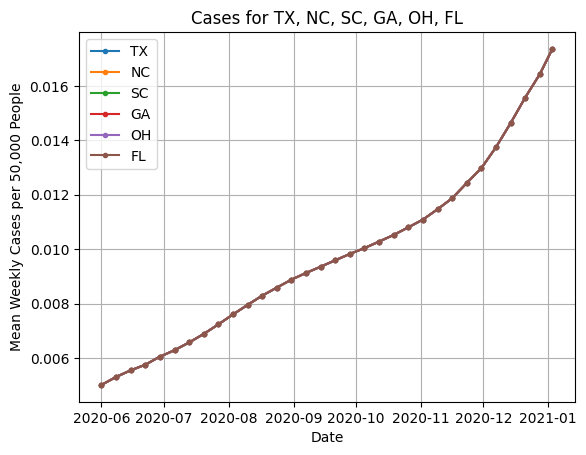

In [42]:
states = ['TX', 'NC', 'SC', 'GA', 'OH', 'FL']

fig, ax = plt.subplots()
for state in states:
    s_info = state_stats(state, covid_deaths).T
    ax.plot(s_info.index, s_info['mean'], label=state, marker='.')

ax.legend()
ax.title.set_text('Cases for TX, NC, SC, GA, OH, FL')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Weekly Cases per 50,000 People')
ax.grid()
plt.show()

Mean Cases

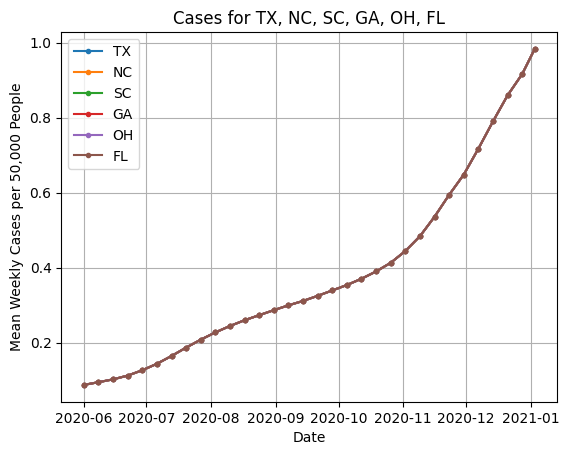

In [43]:
fig, ax = plt.subplots()
for state in states:
    s_info = state_stats(state, covid_cases).T
    ax.plot(s_info.index, s_info['mean'], label=state, marker='.')

ax.legend()
ax.title.set_text('Cases for TX, NC, SC, GA, OH, FL')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Weekly Cases per 50,000 People')
ax.grid()
plt.show()

Median Deaths

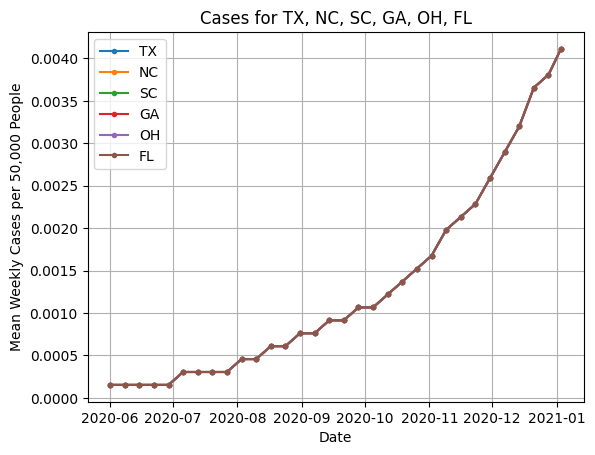

In [44]:
states = ['TX', 'NC', 'SC', 'GA', 'OH', 'FL']

fig, ax = plt.subplots()
for state in states:
    s_info = state_stats(state, covid_deaths).T
    ax.plot(s_info.index, s_info['median'], label=state, marker='.')

ax.legend()
ax.title.set_text('Cases for TX, NC, SC, GA, OH, FL')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Weekly Cases per 50,000 People')
ax.grid()
plt.show()

Median Cases

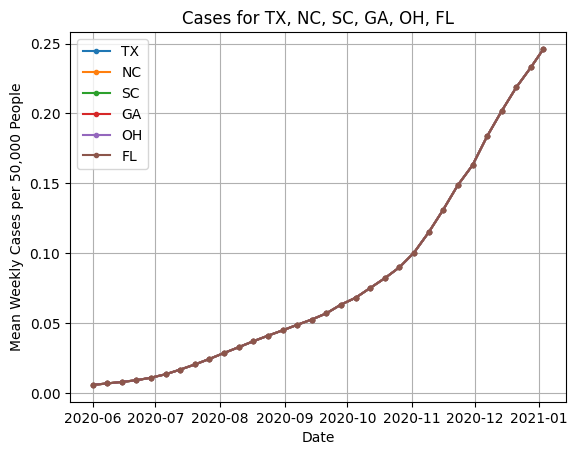

In [45]:
states = ['TX', 'NC', 'SC', 'GA', 'OH', 'FL']

fig, ax = plt.subplots()
for state in states:
    s_info = state_stats(state, covid_cases).T
    ax.plot(s_info.index, s_info['median'], label=state, marker='.')

ax.legend()
ax.title.set_text('Cases for TX, NC, SC, GA, OH, FL')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Weekly Cases per 50,000 People')
ax.grid()
plt.show()

# Why are the trends the way they are

I'm having a hard time getting my plots to show the data correctly, but infection numbers largely come down to population density, travel, and government action.  Flordida and Texas start out with relatively high numbers due to their populations density and status as tourist and buisiness locations.  The overall patterns for the states follows a similar curve to that of the United States at large though.  Both are characterized by a slow start followed by a curve that increases in slope.

# Finding the counties with the highest cases.